# Cohort Analysis and Customer Segmentation Project



## Introduction

**Cohort Analysis** 

Cohort means a group of entities with common behaviour or characteristics.
What then is cohort analysis?
Cohort analysis is a type of behavioural analytics in which entities (in this case consumers ) are grouped based on their shared characteristics.It is basically the discription of cohorts.

Cohort analytics could be based on cohort size,behavoir or even time. Time based cohort analysis calculates retention rate which helps make informed product decisions that reduce customer churn and increase revenue. 
Time based cohort analysis measures customer engagement over time.

**Customer segmentation**

Customer segmentation is the act of dividing customers into groups such that each group has similar characteristics.
Customer segmentation could be based on customer location, demographics, or behaviour.

This project is divided into two sections. Whiles section one focuses on cohort analysis , section two focues on customer segmentation for a retail company.

## Problem Statements

A UK based retail company wants to improve its products, customer relations and maximize sales.
To achieve this, the comapny decides to want to the percentage of customers it's able to retain in a month.
The company also need to segment it cusromers for target maketting and promotions.



## Objectives
The project objectives  are:

1. to culculate customer retention rate for the UK based Retail Company.

2. segment the customers of the Retail Company based on their behaviour.The behaviour under considerstion includes  customer recent transaction with the company,how frequently each cutomer buys products from the company and how much each spends on the company products.

3. Analyse each segments.


## Solution Steps

**1. Data gathering**

The dataset of the UK based Retailed Company can be obtained from the [UCI Machine learning repository](https://archive.ics.uci.edu/ml/datasets/online+retail)

**2. Exploratory Data Analysis and Data Cleaning**

At this stage, the data was explored using descriptive statistics and visualizations.
The quality of the data was ensured by cleaning and removing missing and  negative values of sales and unit price which were  percieved to be returned goods or data entry error.

**3. Time based cohort analysis**
This stage provides solution to the first part of the problem stament.

At this stage, the retention rate for each cohort is calculated and visualized. 


**4. Feature Engineering**

Metrics that represent customers behaviour were created to from the alresdy existing variables.
The metrics includes Recency,Frequency and Monetary.
Segmentation will be done using these metrics.

**5. Data preprocessing for modelling**

At this point, the metrics are centered and tranformed to enhace KMeans clustering.

**6. Creating clusters using KMeans Algorithm**

This is the modelling stage where an unsupervised machine learning algorithm is implemented to build custers. 

**7. Analysing each cluster**

This satge involves analysis of  each cluster to regards Recency Frequency and Monetary value.

**8. Conclusion and Recommendations**

This is the final stage. It comprises the report on the the findings from the project and recomendations.


## Definitions of metrics used

**Recency (R)** refers to the days since last purchase.

It is calculated by deducting the the date that the customer made the last purchase from the offset date(the assumed date when the analysis was carried out)

**Frequency (F)** refers to the total number of transactions a customer has made with the company.

It represents how many times a customer purchased from our company.It it calculated by counting the number of times a customer made transaction with the company.

**Monetary (M)** refers to the total  money a customer has spent on the company's products.

It is calculated by multiplying quantity by unitprice.



### Importing the necessary packages

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sidetable
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Data gathering

In [2]:
#Importing the data
data = pd.read_csv('data.csv',parse_dates = ['InvoiceDate'],encoding= 'latin1')

# 2.Exploratory Data Analysis and Data Cleaning

In [3]:
#Viewing the first five rows

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#checking the shape of te data
print('The data contains {} rows, {} columns'.format(data.shape[0],data.shape[1]))

The data contains 541909 rows, 8 columns


In [5]:
# Printing the columns in the dataset

for col in data.columns:
    print(col)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country


In [6]:
# Capitalizing the first character of the column names
data.columns=data.columns.str.title()

In [7]:
for col in data.columns:
    print(col)

Invoiceno
Stockcode
Description
Quantity
Invoicedate
Unitprice
Customerid
Country


### Dealing with missing values

In [8]:
#Checking for missing values

data.isnull().sum()

Invoiceno           0
Stockcode           0
Description      1454
Quantity            0
Invoicedate         0
Unitprice           0
Customerid     135080
Country             0
dtype: int64

In [9]:
# Dropping all missing values

data = data.dropna()

In [10]:
data.isnull().sum()

Invoiceno      0
Stockcode      0
Description    0
Quantity       0
Invoicedate    0
Unitprice      0
Customerid     0
Country        0
dtype: int64

In [11]:
#Inspecting the data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoiceno    406829 non-null  object        
 1   Stockcode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   Invoicedate  406829 non-null  datetime64[ns]
 5   Unitprice    406829 non-null  float64       
 6   Customerid   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


### Checking Descriptive Statistics and dealing with abnormal values

In [12]:
data.describe()

,Quantity,Unitprice,Customerid
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### Dropping negative values in the Quantity column.

The negative values in the Quantity column are perceived to be goods returned.

Meaning there was no actual sales hence must not be included in the analysis.

In [13]:

data = data[data['Quantity']>0]


#### Dropping negaive values in the Unitprice column.

The negative values in the Unitprice column are perceived to be refunding for returned goods hence dropped in order not have an impact on the analysis.


In [14]:
data = data[data['Unitprice']>0]

In [15]:
data.describe()

,Quantity,Unitprice,Customerid
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [16]:
#Discriptive statistics of the categorical variables

data.describe(include = 'object')

,Invoiceno,Stockcode,Description,Country
count,397884,397884,397884,397884
unique,18532,3665,3877,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2035,2028,354321


# 3. Time based cohort analysis

The Customerid,Invoicedate and Unitprice will be used in this section of the project.

### Assigning acquisition month to cohorts
Customers who made their first transaction in a given month are assigned to that month.

eg:All customers who purchased items in January are assigned to January.

In [17]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)

In [18]:
data['Invoice_month'] = data['Invoicedate'].apply(get_month)

In [19]:
data['Invoicedate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: Invoicedate, dtype: datetime64[ns]

In [20]:
# Group by customer id
grouping = data.groupby('Customerid')['Invoice_month']

In [21]:
#Setting the first time a customer made a transaction with the company as cohort month

data['Cohortmonth'] = grouping.transform('min')

In [22]:
data.head()

,Invoiceno,Stockcode,Description,Quantity,Invoicedate,Unitprice,Customerid,Country,Invoice_month,Cohortmonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


## Creating Cohort index

The cohort index in this project represents the number of months that has elapsed since a cohort began.

In [23]:
def get_date_int(df,column):
    """
    This function extracts the year,month and day from a given date.
    
    Input: Pandas Dataframe,a date column
    
    Output: Returns year, month and day in integers
    
    """   
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year,month,day

In [24]:
# Extracting the year and month from Invoice_month and the Cohortmonth
# calculating the cohort index

invoiceYear,invoiceMonth, _ = get_date_int(data,'Invoice_month')
cohortYear,cohortMonth, _ = get_date_int(data,'Cohortmonth')

years_diff = invoiceYear - cohortYear
months_diff = invoiceMonth - cohortMonth

data['Cohortindex'] = (years_diff*12) +months_diff+1

In [25]:
data['Cohortindex'].head()

0    1
1    1
2    1
3    1
4    1
Name: Cohortindex, dtype: int64

In [26]:
data.head()

,Invoiceno,Stockcode,Description,Quantity,Invoicedate,Unitprice,Customerid,Country,Invoice_month,Cohortmonth,Cohortindex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


### Counting monthly active customers of each cohort

In [27]:
grouping = data.groupby(['Cohortmonth','Cohortindex'])


cohort_data = grouping['Customerid'].apply(pd.Series.nunique)





In [28]:
cohort_data.head()

Cohortmonth  Cohortindex
2010-12-01   1              885
             2              324
             3              286
             4              340
             5              321
Name: Customerid, dtype: int64

In [29]:
cohort_data=cohort_data.reset_index()


In [30]:
cohort_data.head()

,Cohortmonth,Cohortindex,Customerid
0,2010-12-01,1,885
1,2010-12-01,2,324
2,2010-12-01,3,286
3,2010-12-01,4,340
4,2010-12-01,5,321


### Creating a pivot table with the cohorts data

In [31]:
cohort_counts =cohort_data.pivot(index='Cohortmonth',columns ='Cohortindex',values = 'Customerid')

In [32]:
cohort_counts

Cohortindex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohortmonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The pivot table above shows the number of customers in each cohort that the company retained as months pass by.

For example, consiedring the **2010-12-01** cohort which is made up of 825 customers,445 of them were still making transactions with the company after one year(12 months).

This to say the that the company was able to retain 445 (about 50.3%) out 825 customers after a year. 

## Retention rate in percentage

In [33]:
# Getting the size of each cohort

cohort_sizes = cohort_counts.iloc[:,0]

In [34]:
# Dividing each cohort by it size to get the retension rate.

retention = cohort_counts.divide(cohort_sizes,axis=0)

In [35]:
retention

Cohortindex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohortmonth,,,,,,,,,,,,,
2010-12-01,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02-01,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03-01,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04-01,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Changing the Retention rates to percentages

retention=retention.round(3)*100

In [37]:
retention

Cohortindex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohortmonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Changing the index to strings 

retention.index =retention.index.astype(str)

## Visualizing the retention rates with a heatmap

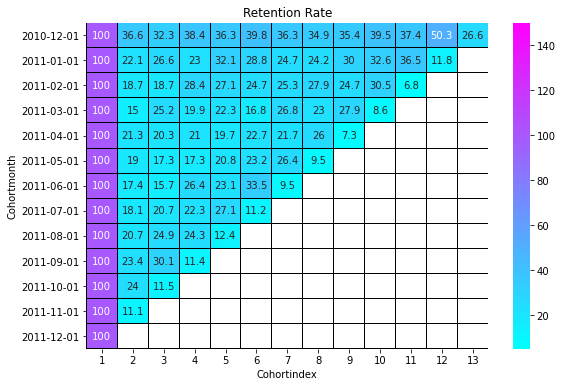

In [39]:
plt.figure(figsize = (9,6))
plt.title('Retention Rate')
sns.heatmap(data = retention,annot = True,
           fmt = '.3g',
           vmin = 5,
           vmax=150,
           cmap = 'cool',
           linecolor='black',
           linewidths=0.01)
plt.show()

### Customer Segmentation

Behavioural customer segmentation based on Recency,Frequency and Monetary metrics.

# 4. Feature Engineering

### Calculating the RFM metrics

In [40]:
for col in data:
    print(col)

Invoiceno
Stockcode
Description
Quantity
Invoicedate
Unitprice
Customerid
Country
Invoice_month
Cohortmonth
Cohortindex


In [41]:
df = data[['Customerid','Invoiceno','Invoicedate','Unitprice','Quantity']] 

#### Creating a hypothetical snapshot_day
Let the snap short day be the day after the last transaction

In [42]:

snapshot_date = max(df['Invoicedate'])+dt.timedelta(days = 1)

print('last date:',max(df['Invoicedate']),'\n')
print('snapshot_date:',snapshot_date )


last date: 2011-12-09 12:50:00 

snapshot_date: 2011-12-10 12:50:00


In [43]:
# Creating sales variable in order to calculate monetory value of each cutomer.

df['Sales']= df['Quantity']*df['Unitprice']

In [44]:
#culculating the recency, frequency and monetary value of each customer

data_RMF = df.groupby(['Customerid']).agg({'Invoicedate':lambda x:(snapshot_date - x.max()).days,
                                                'Invoiceno':'count',
                                                 'Sales':'sum'})

In [45]:
data_RMF.head()

,Invoicedate,Invoiceno,Sales
Customerid,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [46]:
#Rename the columns
data_RMF.rename(columns={'Invoicedate':'Recency',
                               'Invoiceno':'Frequency',
                            'Sales':'Monetary'},inplace = True)


In [47]:
data_RMF.head()

,Recency,Frequency,Monetary
Customerid,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


### Creating quatiles for the metrics


In [48]:
# Quantiles for Recency
# Note that With Recency, the lower the values the better.

r_labels = range(4,0,-1)

r_quartiles = pd.qcut(data_RMF['Recency'],4,labels = r_labels)
data_RMF=data_RMF.assign(R=r_quartiles.values)

In [49]:
data_RMF.head()

,Recency,Frequency,Monetary,R
Customerid,,,,
12346.0,326,1,77183.60,1
12347.0,2,182,4310.00,4
12348.0,75,31,1797.24,2
12349.0,19,73,1757.55,3
12350.0,310,17,334.40,1


In [50]:
# Quantiles for Frequency and Monetary
# The higher the values the better.

f_labels = range(1,5)
m_labels = range(1,5)

f_quartiles = pd.qcut(data_RMF['Frequency'],4,labels = f_labels)
m_quartiles = pd.qcut(data_RMF['Monetary'],4,labels = m_labels)

data_RMF=data_RMF.assign(F=f_quartiles.values)
data_RMF=data_RMF.assign(M=m_quartiles.values)

In [51]:
data_RMF.head()

,Recency,Frequency,Monetary,R,F,M
Customerid,,,,,,
12346.0,326,1,77183.60,1,1,4
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [52]:
data_RMF.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Recency    4338 non-null   int64   
 1   Frequency  4338 non-null   int64   
 2   Monetary   4338 non-null   float64 
 3   R          4338 non-null   category
 4   F          4338 non-null   category
 5   M          4338 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 148.7 KB


In [53]:
data_RMF.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,91.720609,2054.266460
std,100.014169,228.785094,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,307.415000
50%,51.000000,41.000000,674.485000
75%,142.000000,100.000000,1661.740000
max,374.000000,7847.000000,280206.020000


In [54]:
# Creating RFM Segment and RFM Score

def join_rfm(x):
    return str(x['R'])+str(x['F'])+str(x['M'])
data_RMF['RFM_Segment'] = data_RMF.apply(join_rfm,axis =1)
data_RMF['RFM_Score'] = data_RMF[['R','F','M']].sum(axis =1)

In [55]:
data_RMF.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
Customerid,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6.0
12347.0,2,182,4310.00,4,4,4,444,12.0
12348.0,75,31,1797.24,2,2,4,224,8.0
12349.0,19,73,1757.55,3,3,4,334,10.0
12350.0,310,17,334.40,1,1,2,112,4.0


### Inspecting the RFM metrics


In [56]:
data_RMF.groupby('RFM_Segment').size().sort_values(ascending = False )[:10]

RFM_Segment
444    447
111    385
344    217
122    206
211    179
233    169
333    166
222    160
433    150
322    130
dtype: int64

In [57]:
data_RMF[data_RMF['RFM_Segment']=='444'].head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
Customerid,,,,,,,,
12347.0,2,182,4310.00,4,4,4,444,12.0
12362.0,3,266,5226.23,4,4,4,444,12.0
12417.0,3,192,3649.10,4,4,4,444,12.0
12423.0,1,125,1859.31,4,4,4,444,12.0
12433.0,1,420,13375.87,4,4,4,444,12.0


In [58]:
data_RMF['RFM_Segment'].nunique()

61

In [59]:
data_RMF['RFM_Segment'].value_counts()

444    447
111    385
344    217
122    206
211    179
      ... 
314      7
414      6
124      5
142      4
441      3
Name: RFM_Segment, Length: 61, dtype: int64

### Summary of the metrics


In [60]:
data_RMF.groupby('RFM_Score').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']})

Recency   Frequency     Monetary      
                 mean        mean         mean count
RFM_Score                                           
3.0        260.846753    8.233766   159.310260   385
4.0        175.356021   13.625654   239.422618   382
5.0        154.337209   21.447674   368.501746   516
6.0         96.476087   27.926087   825.746459   460
7.0         79.126362   38.498911   755.451351   459
8.0         64.568282   56.814978   994.145551   454
9.0         45.961631   79.959233  1801.352978   417
10.0        32.075117  112.295775  2049.427512   426
11.0        21.114796  187.683673  4083.222500   392
12.0         7.279642  374.447427  9319.207964   447

# Manual Customer Segmentation

Manually segmenting the customers based on the RFM Scores

In [61]:
data_RMF['Manual_segments'] = pd.qcut(data_RMF['RFM_Score'],q = 3,labels = ['Bronze','Silver','Gold'] )

In [62]:
data_RMF.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Manual_segments
Customerid,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6.0,Bronze
12347.0,2,182,4310.00,4,4,4,444,12.0,Gold
12348.0,75,31,1797.24,2,2,4,224,8.0,Silver
12349.0,19,73,1757.55,3,3,4,334,10.0,Gold
12350.0,310,17,334.40,1,1,2,112,4.0,Bronze


### Analyzing the manuel segments

In [63]:
data_RMF.groupby('Manual_segments').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(0)

Recency Frequency Monetary      
                   mean      mean     mean count
Manual_segments                                 
Bronze            167.0      19.0    415.0  1743
Silver             64.0      58.0   1165.0  1330
Gold               20.0     228.0   5249.0  1265

From the ouput above, the segment labelled Gold, comprises the most precious customers to the company.

It has the lowest average recency, the highest average frequency and monetary values.

The next important group is the segment labelled silver.

The last group labelled Bronze is the least committed customers.

They seldomly buy products from the company.


### Preprocessing the data for  K-means Algorithm

#### Exploring the Variables

In [64]:
def explore_num(df,x):
    print('Summary Statistics \n')
    print(df[x].apply([len,min,max,np.median,np.mean,np.std]))
    print('======================================')
    print('Missing values: {}'.format(df[x].isnull().sum()))
    print('======================================\n')
    plt.figure(figsize = (8,4))
    #plotting a boxplot
    meanpointprops = dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick')
    medianprops = dict(linestyle='-.', linewidth=3, color='gold')
    plt.subplot(1,2,1)
    plt.boxplot(df[x],vert=True,patch_artist=True,notch = True,
            showmeans = True,medianprops = medianprops,meanprops = meanpointprops)
    plt.xlabel(df[x].name)
    plt.title('Boxplot')

    # plotting a histogram
    plt.subplot(1,2,2)
    plt.hist(df[x])
    plt.title('Histogram')
    plt.tight_layout()
    plt.show()

Summary Statistics 

len       4338.000000
min          1.000000
max        374.000000
median      51.000000
mean        92.536422
std        100.014169
Name: Recency, dtype: float64
Missing values: 0



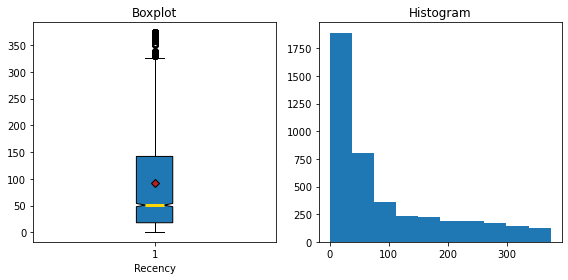

In [65]:
explore_num(data_RMF,'Recency')

Summary Statistics 

len       4338.000000
min          1.000000
max       7847.000000
median      41.000000
mean        91.720609
std        228.785094
Name: Frequency, dtype: float64
Missing values: 0



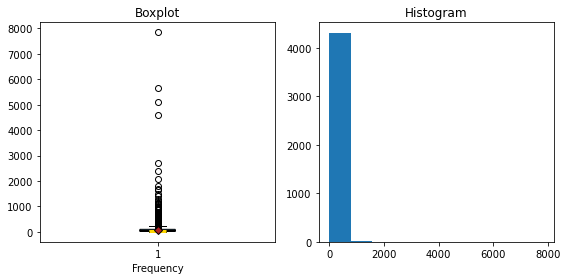

In [66]:
explore_num(data_RMF,'Frequency')

Summary Statistics 

len         4338.000000
min            3.750000
max       280206.020000
median       674.485000
mean        2054.266460
std         8989.230441
Name: Monetary, dtype: float64
Missing values: 0



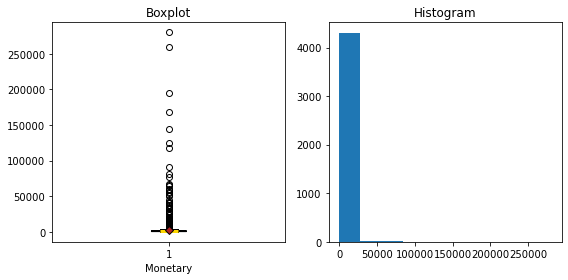

In [67]:
explore_num(data_RMF,'Monetary')

### Transforming the data  using log

In [68]:
data_RMF['Frequency_log']= np.log(data_RMF['Frequency'])
data_RMF['Monetary_log']= np.log(data_RMF['Monetary'])
data_RMF['Recency_log']= np.log(data_RMF['Recency'])

Summary Statistics 

len       4338.000000
min          0.000000
max          5.924256
median       3.931826
mean         3.767534
std          1.432445
Name: Recency_log, dtype: float64
Missing values: 0



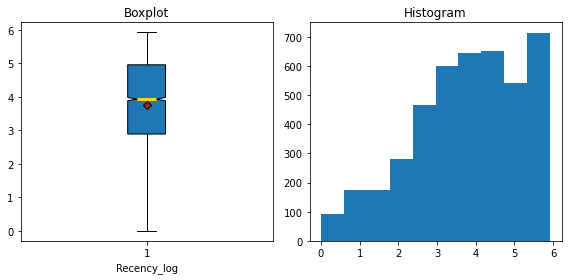

In [69]:
explore_num(data_RMF,'Recency_log')

Summary Statistics 

len       4338.000000
min          0.000000
max          8.967887
median       3.713572
mean         3.679750
std          1.326113
Name: Frequency_log, dtype: float64
Missing values: 0



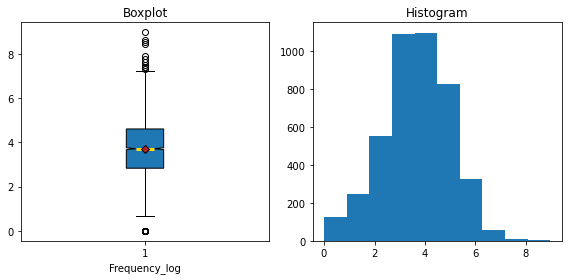

In [70]:
explore_num(data_RMF,'Frequency_log')

Summary Statistics 

len       4338.000000
min          1.321756
max         12.543280
median       6.513949
mean         6.590782
std          1.260895
Name: Monetary_log, dtype: float64
Missing values: 0



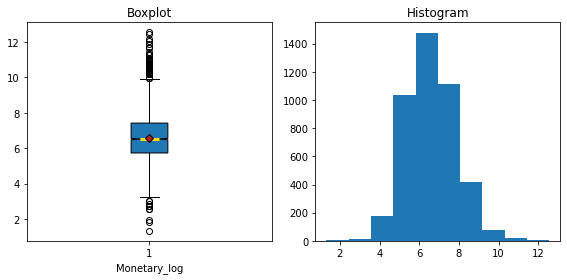

In [71]:
explore_num(data_RMF,'Monetary_log')

### Cetering and scaling the data

In [72]:
data_RMF.describe()

,Recency,Frequency,Monetary,RFM_Score,Frequency_log,Monetary_log,Recency_log
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,92.536422,91.720609,2054.266460,7.505071,3.679750,6.590782,3.767534
std,100.014169,228.785094,8989.230441,2.817089,1.326113,1.260895,1.432445
min,1.000000,1.000000,3.750000,3.000000,0.000000,1.321756,0.000000
25%,18.000000,17.000000,307.415000,5.000000,2.833213,5.728199,2.890372
50%,51.000000,41.000000,674.485000,7.000000,3.713572,6.513949,3.931826
75%,142.000000,100.000000,1661.740000,10.000000,4.605170,7.415621,4.955827
max,374.000000,7847.000000,280206.020000,12.000000,8.967887,12.543280,5.924256


In [73]:
df1 = data_RMF[['Recency_log','Frequency_log','Monetary_log']]

In [74]:
df1.describe().round(1)

,Recency_log,Frequency_log,Monetary_log
count,4338.0,4338.0,4338.0
mean,3.8,3.7,6.6
std,1.4,1.3,1.3
min,0.0,0.0,1.3
25%,2.9,2.8,5.7
50%,3.9,3.7,6.5
75%,5.0,4.6,7.4
max,5.9,9.0,12.5


In [75]:
# Scaling the data using the standardscaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)
df_scaled = scaler.transform(df1)

In [76]:
#df_scaled is now a numpy array

print(df_scaled.mean(axis=0).round(2))
print(df_scaled.std(axis=0).round(2))

[-0. -0.  0.]
[1. 1. 1.]


### Choosing the best number of clusters using the elbow method

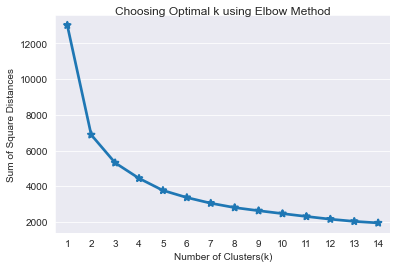

In [77]:
from sklearn.cluster import KMeans
sns.set_style('darkgrid')
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(df_scaled)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),markers = '*')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Choosing Optimal k using Elbow Method',pad = 0.8)
plt.show()

# Creating clusters using KMeans Algorithm

In [78]:
#Perform K-Mean Clustering or build the K-Means clustering model

KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(df_scaled)

#Find the clusters for the observation given in the dataset
data_RMF['Clusters'] = KMean_clust.labels_
data_RMF.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Manual_segments,Frequency_log,Monetary_log,Recency_log,Clusters
Customerid,,,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6.0,Bronze,0.000000,11.253942,5.786897,0
12347.0,2,182,4310.00,4,4,4,444,12.0,Gold,5.204007,8.368693,0.693147,2
12348.0,75,31,1797.24,2,2,4,224,8.0,Silver,3.433987,7.494007,4.317488,0
12349.0,19,73,1757.55,3,3,4,334,10.0,Gold,4.290459,7.471676,2.944439,0
12350.0,310,17,334.40,1,1,2,112,4.0,Bronze,2.833213,5.812338,5.736572,1


#### Changing the scaled data to a DataFrame

In [79]:
df_scaled = pd.DataFrame(df_scaled,index =data_RMF.index,columns = ['Recency','Frequency','Monetary'])

In [80]:
df_scaled.head()

,Recency,Frequency,Monetary
Customerid,,,
12346.0,1.409894,-2.775160,3.698719
12347.0,-2.146498,1.149549,1.410201
12348.0,0.383971,-0.185347,0.716419
12349.0,-0.574674,0.460579,0.698706
12350.0,1.374758,-0.638433,-0.617446


In [81]:
df_scaled['Clusters'] = KMean_clust.labels_

In [82]:
df_scaled.head()

,Recency,Frequency,Monetary,Clusters
Customerid,,,,
12346.0,1.409894,-2.775160,3.698719,0
12347.0,-2.146498,1.149549,1.410201,2
12348.0,0.383971,-0.185347,0.716419,0
12349.0,-0.574674,0.460579,0.698706,0
12350.0,1.374758,-0.638433,-0.617446,1


# 7.Analyzing the the Clusters 

### Melting the data

In [83]:
melt_data = pd.melt(df_scaled.reset_index(),
                   id_vars = ['Customerid','Clusters'],
                   value_vars = ['Recency','Frequency','Monetary'],
                   var_name='Attribute',
                   value_name = 'Value')

In [84]:
melt_data.head()

,Customerid,Clusters,Attribute,Value
0,12346.0,0,Recency,1.409894
1,12347.0,2,Recency,-2.146498
2,12348.0,0,Recency,0.383971
3,12349.0,0,Recency,-0.574674
4,12350.0,1,Recency,1.374758


### Visualizing the clusters using a snake plot

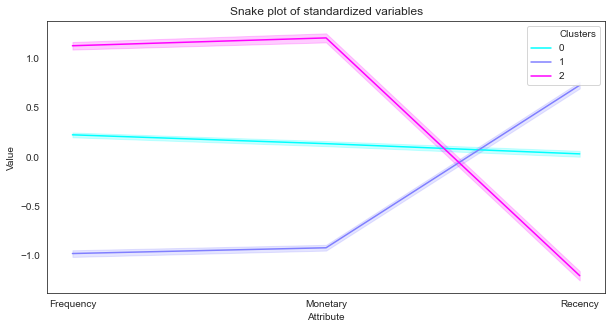

In [85]:
sns.set_style('white')
plt.figure(figsize = (10,5))
plt.title('Snake plot of standardized variables')
sns.lineplot(x='Attribute',y='Value',hue = 'Clusters',data = melt_data, palette = 'cool')
plt.show()

In [86]:
metrics = data_RMF[['Recency','Frequency','Monetary','Clusters']]

In [87]:
cluster_avg = metrics.groupby(['Clusters']).mean()
population_avg = metrics[['Recency','Frequency','Monetary']].mean()
relative_importance = cluster_avg/population_avg-1

In [88]:
cluster_avg.round(2)

,Recency,Frequency,Monetary
Clusters,,,
0,69.59,66.49,1176.28
1,170.55,14.93,294.38
2,12.99,261.50,6518.63


In [89]:
relative_importance.round(2)

,Recency,Frequency,Monetary
Clusters,,,
0,-0.25,-0.28,-0.43
1,0.84,-0.84,-0.86
2,-0.86,1.85,2.17
